In [1]:
import cv2 
import matplotlib.pyplot as plt 
import math
import numpy as np 

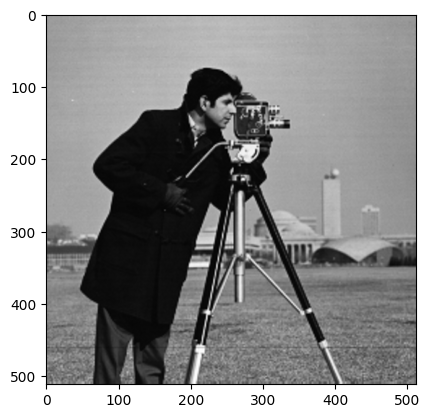

dtype('uint8')

In [2]:
image = cv2.imread("./pics/cameraman.tif")  # تصویر را به صورت bgr دریافت میکنیم

plt.imshow(image) # تصویر را رسم می کنیم
plt.show() # نتیجه نهایی را نمایش میدهیم
image.dtype # نوع تصویر را نمایش میدهیم

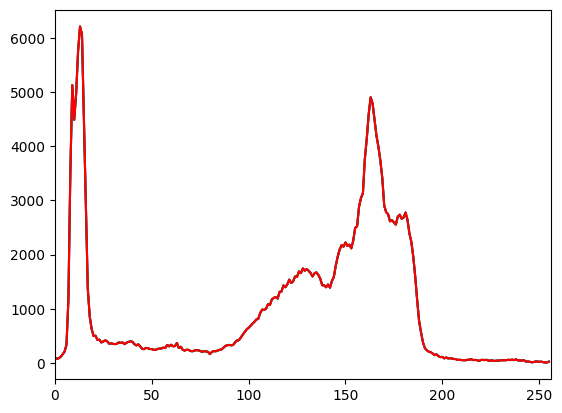

In [3]:
# Histogram plotting of the image 
color = ('b', 'g', 'r') # یک تاپل از حروف اول اسامی رنگ ها
  
for i, col in enumerate(color): # اجزای تاپل را به col و ایندکس های آنها را به i می دهیم
      
    histr = cv2.calcHist([image],  
                         [i], None, 
                         [256],  
                         [0, 256]) # هیستوگرام هر کانال را ایجاد میکنیم
      
    plt.plot(histr, color = col) # حال نمودار هیستوگرام را رسم میکنیم
      
    # Limit X - axis to 256 
    plt.xlim([0, 256]) # بازه نمودار را در محور افقی از 0 تا 255 در نظر میگیریم
      
plt.show() # نتیجه نهایی هیستوگراام ها را نمایش میدهیم

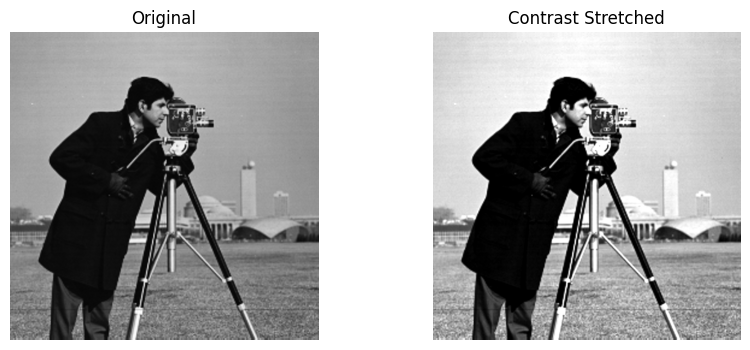

In [4]:
# Apply contrast stretching method 
miniI, maxiI = 80, 150 # حداقل و حداکثر مقدار روشنایی در تصویر ورودی 
minoI, maxoI = 100, 200 # حداقل و حداکثر مقدار روشنایی در تصویر خروجی 

# Load your uint8 image
# image = cv2.imread('img.png')   # already uint8
image_float = image.astype(np.float32) # تصویر را به 32 بیتی تبدیل میکنیم تا محاسبات راحت تر شود 

# Contrast stretching formula:
# pout = (pin - miniI) * ((maxoI - minoI) / (maxiI - miniI)) + minoI
stretched = (image_float - miniI) * ((maxoI - minoI) / (maxiI - miniI)) + minoI # حال فرمول کشش کنتراست را انجام میدهیم

# Clip to valid range and convert back to uint8
stretched = np.clip(stretched, 0, 255).astype(np.uint8) # حال تمام تصویر را انتخاب میکنیم و به فرم استاندارد بازمیگردانیم

plt.figure(figsize=(10,4)) # یک فیگر به اندازه 10 در 4 می سازیم 
plt.subplot(1,2,1) # اندازه هر بخش و ایندکس آن را تنظیم میکنیم
plt.title("Original") # و عنوان بخش را می نویسیم
plt.imshow(image) # حال تصویر را رسم میکنیم
plt.axis("off") # نمودار مختصات آن را محو میکنیم

plt.subplot(1,2,2) # اندازه هر بخش و ایندکس آن را تنظیم میکنیم
plt.title("Contrast Stretched") # عنوان بخش را می نویسیم
plt.imshow(stretched) # تصویر را رسم میکنیم 
plt.axis("off") # نمودار مختصات آن را حذف میکنیم

plt.show() # نتیجه نهایی را نمایش می دهیم

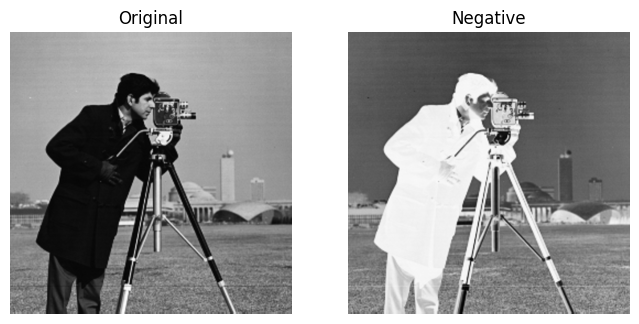

In [5]:
negative = 255 - image # برای نگاتیو یا معکوس کردن تصویر باید مقادیر آن را از 255 کم کنیم

plt.figure(figsize=(8,4)) # یک فیگر به اندازه 8 در 4 می سازیم
plt.subplot(1,2,1)# اندازه بخش و جایگاه تصویر اول را تنظیم میکنیم
plt.title("Original")# عنوان بخش را می نویسیم
plt.imshow(image, cmap='gray') # تصویر را به صورت خاکستری رسم می کنیم
plt.axis("off")# محور مختصات را محو می کنیم

plt.subplot(1,2,2) # اندازه بخش و جایگاه تصویر اول را تنظیم میکنیم
plt.title("Negative")# عنوان بخش را می نویسیم
plt.imshow(negative, cmap='gray') # تصویر را به صورت خاکستری رسم می کنیم
plt.axis("off")# محور مختصات را محو می کنیم

plt.show() # نتایج نهایی را رسم میکنیم 

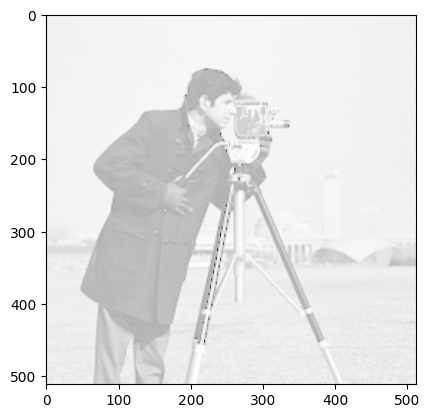

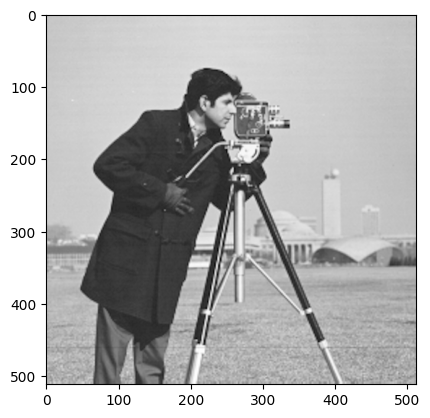

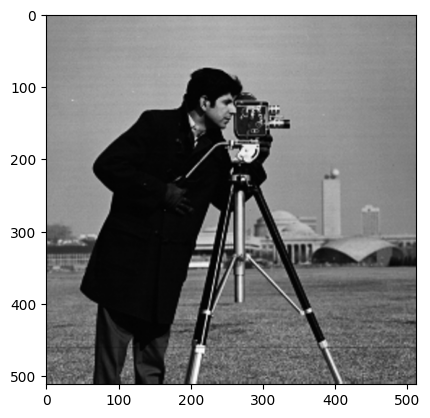

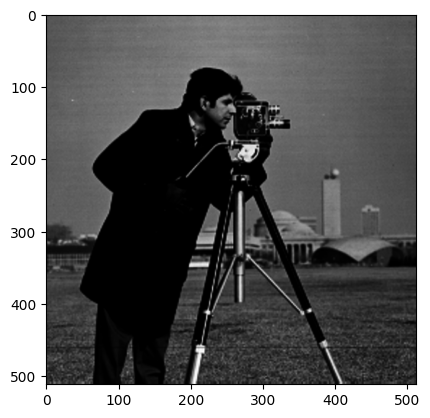

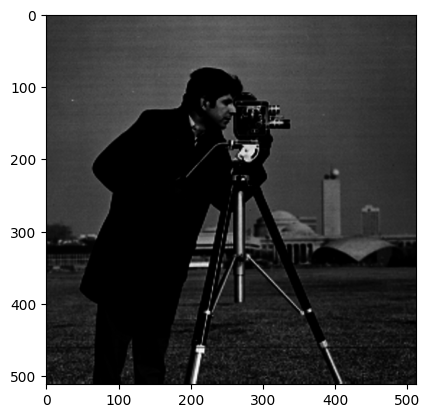

In [6]:
for gamma in [0.1, 0.5, 1.2, 2.2, 3.2]: # حلقه ای حاوی چندین ضریب گاما مشخص میکنیم

    # Apply gamma correction. 
    gamma_corrected = np.array(255*(image / 255) ** gamma, dtype = 'uint8') # حال فرمول گاما را اعمال می کنیم و تصویر را به فرم استاندارد در می آوریم
    plt.imshow(gamma_corrected) # تصاویر با گامای اعمال شده را رسم میکنیم
    plt.show() # نتایج نهایی را نمایش می دهیم